# Clustering Countries Assignment

### HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

###  They have been able to raise around 10 million dollar. Now the management of the NGO needs to decide how to use this money strategically and effectively. 

### Actionable : Need to categorise the countries using socio-economic and health factors that determine the overall development of the country.

Step to follow to suggest management the priorty of the country to be given aid :

1. EDA 

2. Outlier analysis

3. K-means 

4. Hierarchical clustering(both single and complete linkage

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Read and Visualize Dataset

In [2]:
#read the dataset
country= pd.read_csv("Country-data.csv")
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Data Understanding

In [3]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
country.shape

(167, 10)

In [5]:
#Converting exports,imports and health spending percentages to absolute values.
country['exports'] = country['exports']*country['gdpp']/100
country['imports'] = country['imports']*country['gdpp']/100
country['health'] = country['health']*country['gdpp']/100

In [6]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Data Cleaning


In [7]:
#Checking for null value
country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

As there is no null value the data is clean and doesn't require any other cleaning.

In [8]:
country['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

In [9]:
#checking for outliers

country.describe(percentiles=[.25,.50,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


## Data Visualization

{'whiskers': [<matplotlib.lines.Line2D at 0x15c36aea288>,
 'caps': [<matplotlib.lines.Line2D at 0x15c36d5fd48>,
 'boxes': [<matplotlib.lines.Line2D at 0x15c36d4af88>],
 'medians': [<matplotlib.lines.Line2D at 0x15c36d64e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x15c36d53808>],
 'means': []}

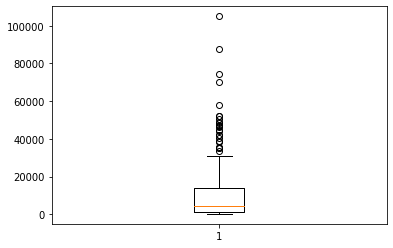

In [10]:
plt.boxplot(country.gdpp)

{'whiskers': [<matplotlib.lines.Line2D at 0x15c36e01f48>,
 'caps': [<matplotlib.lines.Line2D at 0x15c36e04f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x15c36e01448>],
 'medians': [<matplotlib.lines.Line2D at 0x15c36e09e88>],
 'fliers': [<matplotlib.lines.Line2D at 0x15c36e09f88>],
 'means': []}

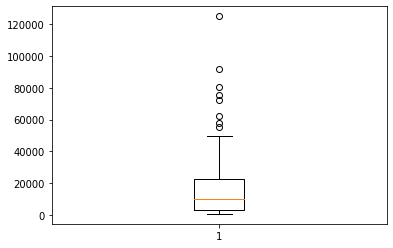

In [11]:
plt.boxplot(country.income)

{'whiskers': [<matplotlib.lines.Line2D at 0x15c36e71d48>,
 'caps': [<matplotlib.lines.Line2D at 0x15c36e76c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x15c36e71288>],
 'medians': [<matplotlib.lines.Line2D at 0x15c36e7ac08>],
 'fliers': [<matplotlib.lines.Line2D at 0x15c36e7ad08>],
 'means': []}

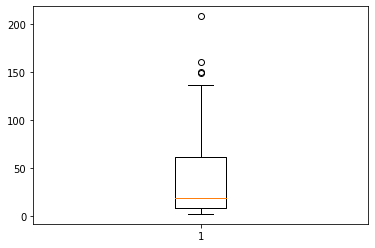

In [12]:
plt.boxplot(country.child_mort)

{'whiskers': [<matplotlib.lines.Line2D at 0x15c36ede708>,
 'caps': [<matplotlib.lines.Line2D at 0x15c36edefc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x15c36edbb88>],
 'medians': [<matplotlib.lines.Line2D at 0x15c36ee2f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x15c36ee7dc8>],
 'means': []}

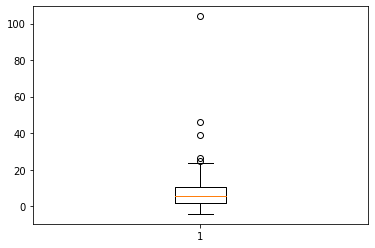

In [13]:
plt.boxplot(country.inflation)

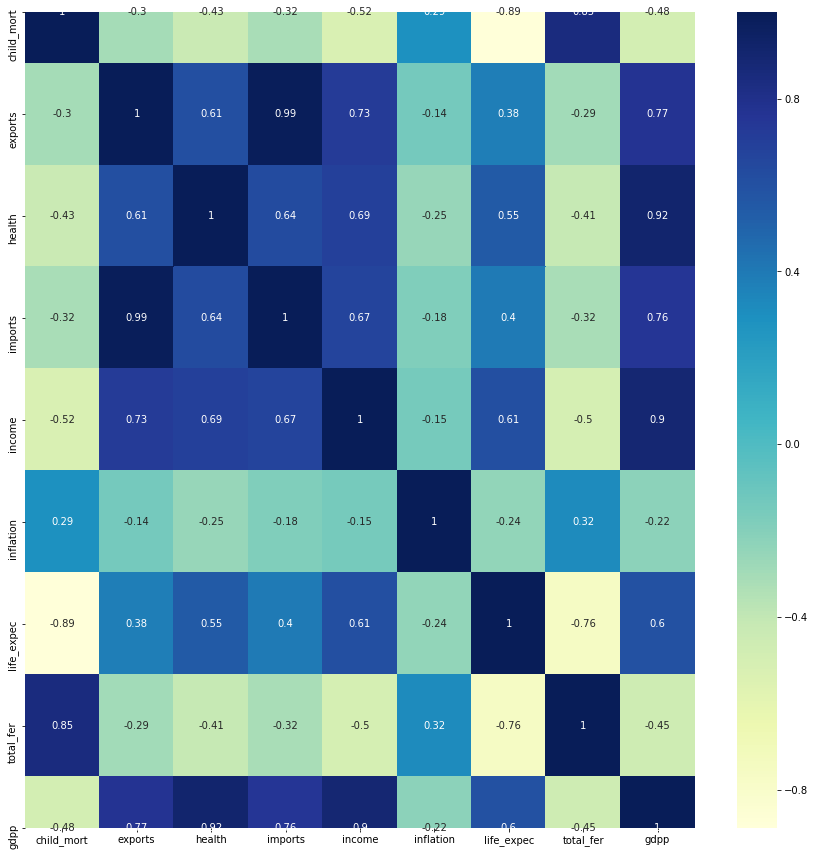

In [14]:
#so this data seems largely clean,but we have a lot of variables and making and visualising proper clusters will be a difficulty.
#Let's see if we can apply PCA to do dimensional reduction
#first let's plot the correlation matrix and check if the data is indeed highly correlated
#so that the usage of PCA in this scenario is justified
plt.figure(figsize = (15,15))        
sns.heatmap(country.corr(),annot = True,cmap="YlGnBu")

<Figure size 288x288 with 0 Axes>

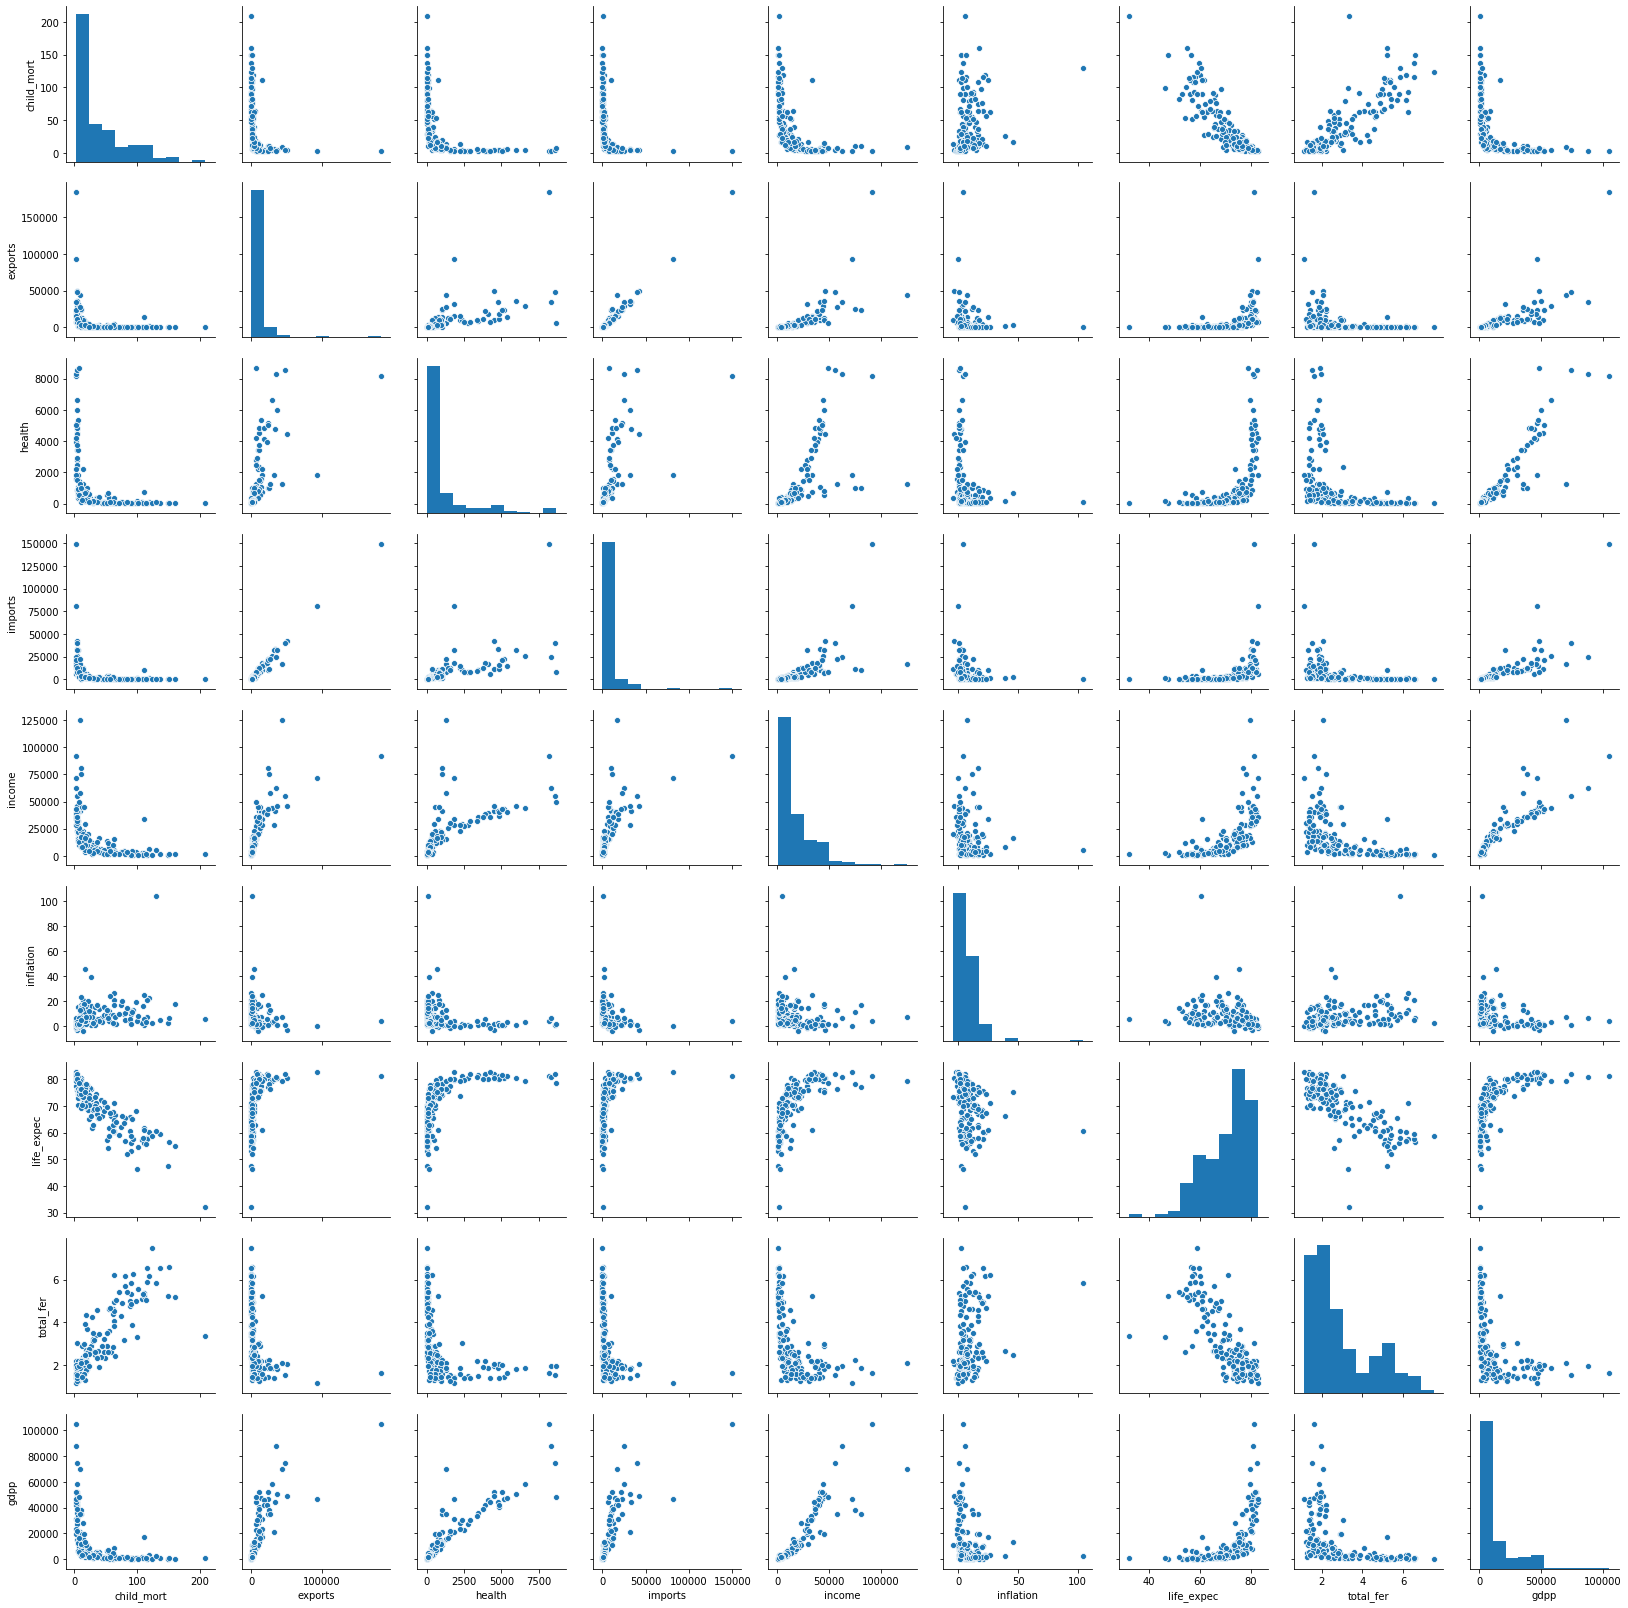

In [15]:
#pairplot of numerical variables
plt.figure(figsize = (4,4))
sns.pairplot(country)
plt.show()

## Scaling the data:

In [16]:
data=country.drop(['country'],axis=1)
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [17]:
#we observe that a lot of the data variables are of different orders of magnitude. 
#Let's do rescaling so that PCA can be applied.
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
data_2 = standard_scaler.fit_transform(data)

In [18]:
data_2

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [19]:
country_norm = pd.DataFrame(data_2)
country_norm.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation','life_expec','total_fer','gdpp']
country_norm.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [20]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [21]:
hopkins(country_norm)

0.9452027278035938

## Finding the Optimal Number of Clusters

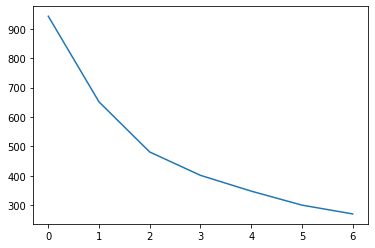

In [22]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_norm)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

##  Silhouette analysis

In [23]:

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_norm)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_norm, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.45863306035476264
For n_clusters=3, the silhouette score is 0.4218615812599681
For n_clusters=4, the silhouette score is 0.42914711278370843
For n_clusters=5, the silhouette score is 0.4340796716611797
For n_clusters=6, the silhouette score is 0.405524012004562
For n_clusters=7, the silhouette score is 0.30439950889830625
For n_clusters=8, the silhouette score is 0.3126794500370572


In [24]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(country_norm)
    sse_.append([k, silhouette_score(country_norm, kmeans.labels_)])

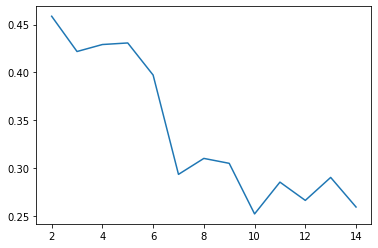

In [25]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

Hence from the Elbow curve , silhouette analysis we found out that K=3 will be the appropriate number of clusters to go with.

### Kmeans with K= 3

In [26]:
country_clust = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
country_clust.fit(country_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [27]:
country_clust.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 1, 1, 2, 2, 1, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [28]:
# assigning the clusterid to each variables

country_norm['cluster_id'] = country_clust.labels_
country_norm.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180,2
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268,2
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1


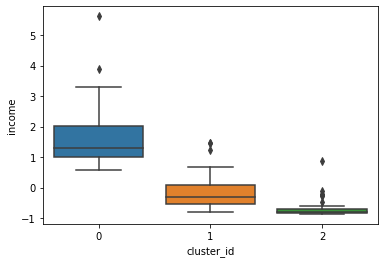

In [29]:
#Boxplot between cluster_id and income

sns.boxplot(x='cluster_id', y='income', data=country_norm)

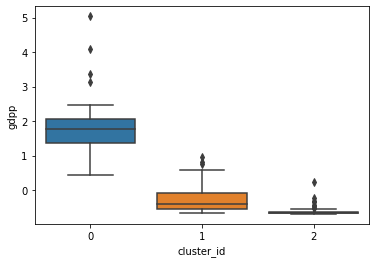

In [30]:
#Boxplot between cluster_id and gdpp

sns.boxplot(x='cluster_id', y='gdpp', data=country_norm)

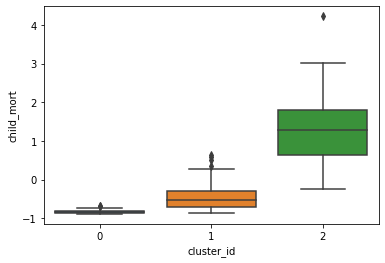

In [31]:
#Boxplot between cluster_id and child_mort

sns.boxplot(x='cluster_id', y='child_mort', data=country_norm)

In [32]:
country_norm['cluster_id'].value_counts()

1    91
2    48
0    28
Name: cluster_id, dtype: int64

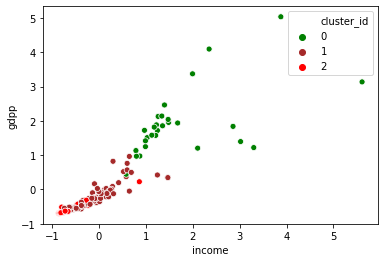

In [33]:
#scatter plot between income and gdpp

sns.scatterplot(x='income',y='gdpp',hue='cluster_id',legend='full',data=country_norm,palette=['green','brown','red'])

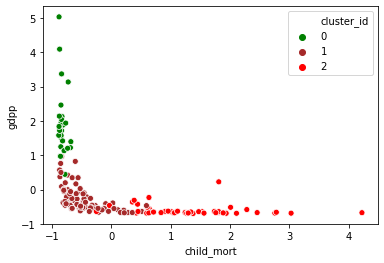

In [34]:
#scatter plot between child_mort and gdpp

sns.scatterplot(x='child_mort',y='gdpp',hue='cluster_id',legend='full',data=country_norm,palette=['green','brown','red'])

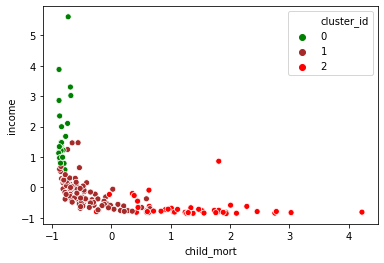

In [35]:
#Separating cluster_id from country_norm

sns.scatterplot(x='child_mort',y='income',hue='cluster_id',legend='full',data=country_norm,palette=['green','brown','red'])

In [36]:
country_norm.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp', 'cluster_id'],
      dtype='object')

In [37]:
#Separating cluster_id from country_norm

cluster_id = country_norm.drop(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],axis=1)

In [38]:
cluster_id

,cluster_id
0,2
1,1
2,1
3,2
4,1
...,...
162,1
163,1
164,1
165,2


In [39]:
# Concating cluster_id to the original dtatframe

country_final = pd.concat([country,cluster_id],axis=1)
country_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


In [40]:
#let's take mean of all the columns and analyze them clusterwise

child_mort_mean = pd.DataFrame(country_final.groupby(["cluster_id"]).child_mort.mean())

exports_mean= pd.DataFrame(country_final.groupby(["cluster_id"]).exports.mean())

health_mean = pd.DataFrame(country_final.groupby(["cluster_id"]).health.mean())

imports_mean = pd.DataFrame(country_final.groupby(["cluster_id"]).imports.mean())

income_mean = pd.DataFrame(country_final.groupby(["cluster_id"]).income.mean())

inflat_mean = pd.DataFrame(country_final.groupby(["cluster_id"]).inflation.mean())

life_expec_mean = pd.DataFrame(country_final.groupby(["cluster_id"]).life_expec.mean())

total_fer_mean = pd.DataFrame(country_final.groupby(["cluster_id"]).total_fer.mean())

gdpp_mean = pd.DataFrame(country_final.groupby(["cluster_id"]).gdpp.mean())



In [41]:
country_analysis_df = pd.concat([pd.Series([0,1,2]),child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflat_mean,life_expec_mean,
                                 total_fer_mean,gdpp_mean], axis=1)

In [42]:
country_analysis_df.columns = ["cluster_id","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
country_analysis_df

,cluster_id,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,48114.285714
1,1,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055,7979.912088
2,2,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333


In child mortality cluster-2 is at top.

In income cluster-2 is at bottom .

In gdpp also cluster-2 is at bottom .

So as we are going to choose countries which are in dire need of aid , let's focus on cluster-2.

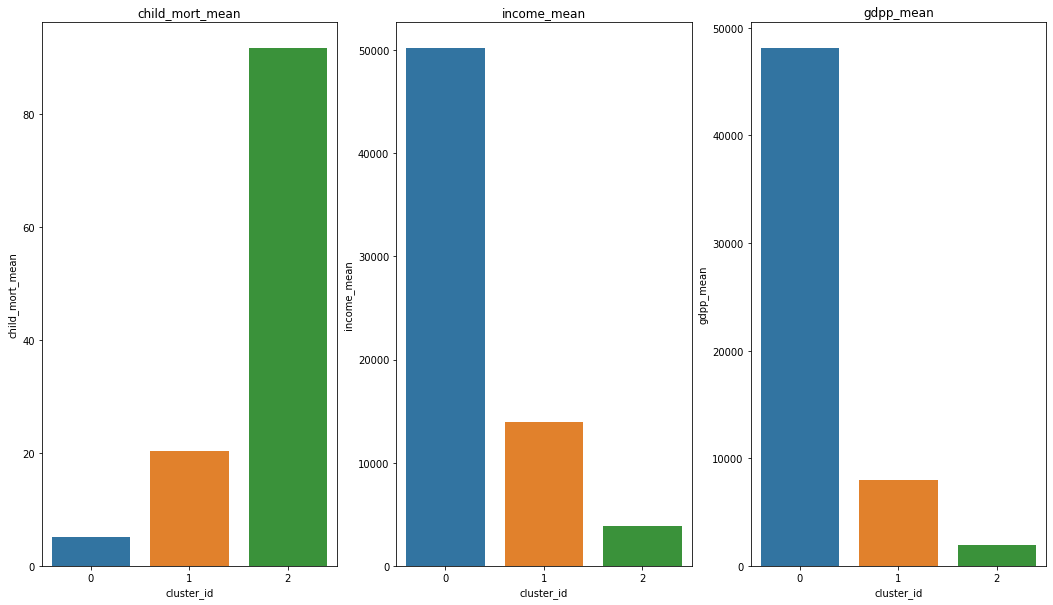

In [43]:
#Plotting the figures so tha we can visualize easily.

plt.figure(figsize = (18,10))
plt.figure(1)

# subplot 1
plt.subplot(1, 3, 1)
plt.title("child_mort_mean")
sns.barplot(country_analysis_df.cluster_id, country_analysis_df.child_mort_mean)

# subplot 2 
plt.subplot(1, 3, 2)
plt.title("income_mean")
sns.barplot(country_analysis_df.cluster_id, country_analysis_df.income_mean)

# subplot 9
plt.subplot(1, 3, 3)
plt.title("gdpp_mean")
sns.barplot(country_analysis_df.cluster_id, country_analysis_df.gdpp_mean)

plt.show()

Looking at the graph we are certain that cluster-2  is our cluster of concern. Because:

1. It has highest child mortality.
2. Lowest income.
3. Lowest gdpp.

In [61]:
#Let us bin our cluster 2
cluster_km=country_final[country_final['cluster_id']==2]
cluster_km.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,2
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,2
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,2
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482,2


#### As per K- means clustering, the country which are direst need of aid are:

1. Burundi
2. Liberia
3. Congo, Dem. Rep
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10. Eritrea

## Hierarchical Clustering:

In [45]:
country_scaled=country_norm.drop(['cluster_id'],axis=1)
country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [46]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


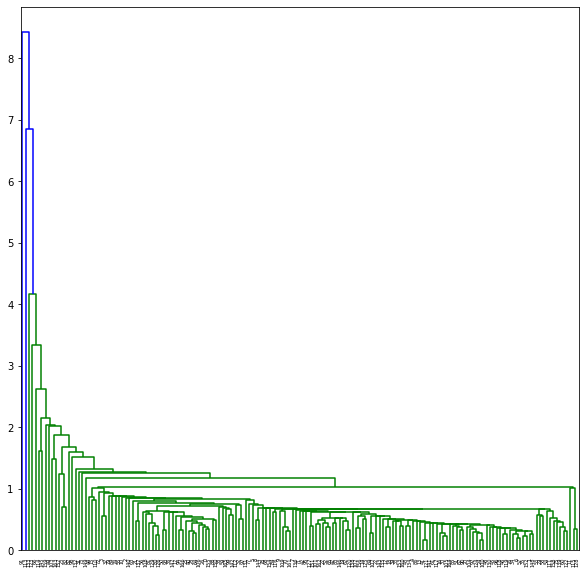

In [47]:
# HC with single linkage method
fig = plt.figure(figsize = (10,10))
mergings = linkage(country_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

By single method heirarchical clustering things are not clear, so let us go for complete heirarchical clustering method.

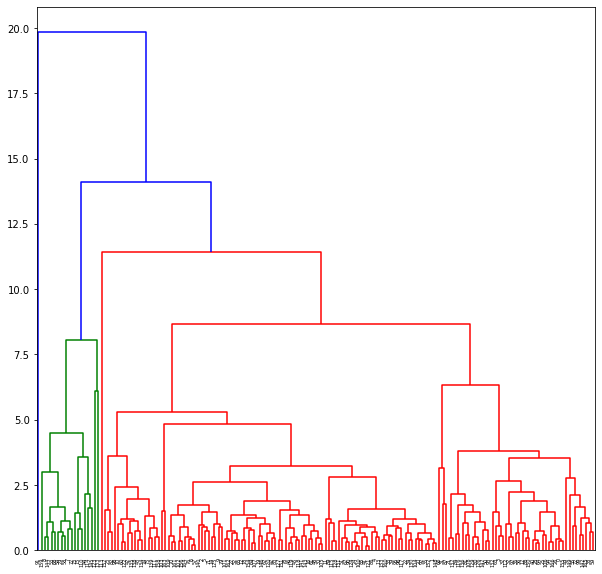

In [48]:
# HC with complete linkage method
fig = plt.figure(figsize = (10,10))
mergings = linkage(country_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

let's cut the dendogram at n = 3.

In [49]:
# 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [50]:
# assign cluster labels
country['cluster_id'] = cluster_labels
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [51]:
country['cluster_id'].value_counts()

0    148
1     18
2      1
Name: cluster_id, dtype: int64

### Scatterplots between original variables and cluster id

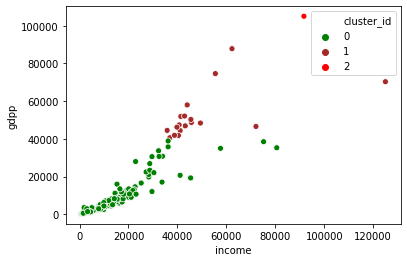

In [52]:
# scatterplot for income,gdpp for different cluster ids
sns.scatterplot(x='income',y='gdpp',hue='cluster_id',legend='full',data=country,palette=['green','brown','red'])

## Analysis of the clusters:

In [58]:
child_mort_mean_h = pd.DataFrame(country.groupby(["cluster_id"]).child_mort.mean())
exports_mean_h= pd.DataFrame(country.groupby(["cluster_id"]).exports.mean())
health_mean_h = pd.DataFrame(country.groupby(["cluster_id"]).health.mean())
imports_mean_h = pd.DataFrame(country.groupby(["cluster_id"]).imports.mean())
income_mean_h = pd.DataFrame(country.groupby(["cluster_id"]).income.mean())
inflat_mean_h = pd.DataFrame(country.groupby(["cluster_id"]).inflation.mean())
life_expec_mean_h = pd.DataFrame(country.groupby(["cluster_id"]).life_expec.mean())
total_fer_mean_h = pd.DataFrame(country.groupby(["cluster_id"]).total_fer.mean())
gdpp_mean_h = pd.DataFrame(country.groupby(["cluster_id"]).gdpp.mean())

In [59]:
country_analysis_hc= pd.concat([pd.Series([0,1,2]),child_mort_mean_h,exports_mean_h,health_mean_h,imports_mean_h,income_mean_h,inflat_mean_h,life_expec_mean_h,total_fer_mean_h,gdpp_mean_h], axis=1)

In [60]:
country_analysis_hc.columns = ["cluster_id","child_mort_mean_h","exports_mean_h","health_mean_h","imports_mean_h","income_mean_h","inflation_mean_h","life_expec_mean_h","total_fer_mean_h","gdpp_mean_h"]
country_analysis_hc

,cluster_id,child_mort_mean_h,exports_mean_h,health_mean_h,imports_mean_h,income_mean_h,inflation_mean_h,life_expec_mean_h,total_fer_mean_h,gdpp_mean_h
0,0,42.630405,3598.749645,511.946183,3451.232447,12641.641892,8.561986,69.224324,3.098851,7551.445946
1,1,4.388889,29048.800000,5141.550556,24465.133333,50027.777778,1.598444,80.905556,1.780556,52355.555556
2,2,2.800000,183750.000000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000


From the above analysis we can see that cluster-0 has

- High child mortality.

- Low income.

- Low gdpp.

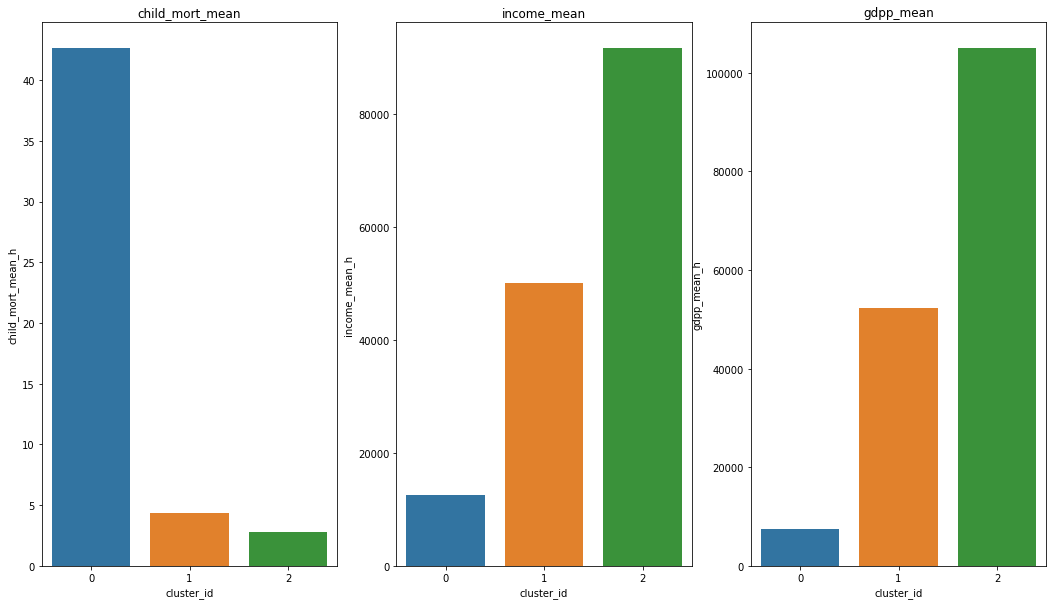

In [56]:
plt.figure(figsize = (18,10))
plt.figure(1)

# subplot 1
plt.subplot(1, 3, 1)
plt.title("child_mort_mean")
sns.barplot(country_analysis_hc.cluster_id, country_analysis_hc.child_mort_mean_h)

# subplot 2 
plt.subplot(1, 3, 2)
plt.title("income_mean")
sns.barplot(country_analysis_hc.cluster_id, country_analysis_hc.income_mean_h)

# subplot 9
plt.subplot(1, 3, 3)
plt.title("gdpp_mean")
sns.barplot(country_analysis_hc.cluster_id, country_analysis_hc.gdpp_mean_h)

plt.show()

In [57]:
cluster_hc=country[country['cluster_id']==0]
cluster_hc.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482,0


As per Heirarchical Clustering, the countries which require aid are:

1. Burundi
2. Liberia
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10. Togo

# Final conclusion :

Countries we got from K-means clustering are:

1. Burundi
2. Liberia
3. Congo, Dem. Rep
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10. Eritrea

Countries got from Hierarchial clustering are:
1. Burundi
2. Liberia
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10. Togo

### Hence the final countries are :
1. Burundi
2. Liberia
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi

